UCI Dataset Link: https://archive.ics.uci.edu/ml/datasets/Maternal+Health+Risk+Data+Set                  
Research Papers:
1) Ahmed M., Kashem M.A., Rahman M., Khatun S. (2020) Review and Analysis of Risk Factor of Maternal Health in Remote Area Using the Internet of Things (IoT)
2) IoT based Risk Level Prediction Model for Maternal Health Care in the Context of Bangladesh, STI-2020

Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Data Collection & Preprocessing

In [3]:
maternal_data = pd.read_csv('data/maternal_health_risk_dataset.csv')
maternal_data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
maternal_data.shape

(1014, 7)

In [5]:
maternal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [6]:
maternal_data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

Data Analysis

In [7]:
maternal_data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [8]:
maternal_data['RiskLevel'].value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

Data Visualization

<AxesSubplot:xlabel='RiskLevel', ylabel='count'>

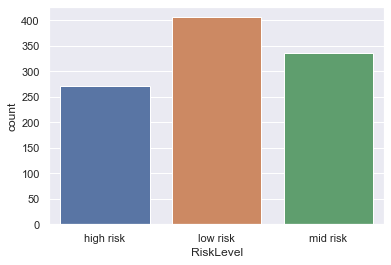

In [9]:
sns.set()
sns.countplot(x='RiskLevel',data=maternal_data)

<AxesSubplot:xlabel='BodyTemp', ylabel='count'>

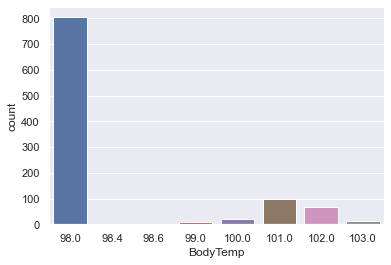

In [11]:
sns.countplot(x='BodyTemp',data=maternal_data)

Separating Features & Target

In [12]:
X = maternal_data.drop(columns='RiskLevel',axis=1)
Y = maternal_data['RiskLevel']

Splitting the Data into Training & Testing Data

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [88]:
print(X.shape,X_train.shape,X_test.shape)

(1014, 6) (811, 6) (203, 6)


In [89]:
Model = []
Accuracy = []
Precision = []
Recall = []
F1Score = []

Model Training - K Nearest Neighbors

In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train.values,Y_train.values)

KNeighborsClassifier()

Model Evaluation - K Nearest Neighbors

In [91]:
knn_y_pred = knn.predict(X_test.values)

In [92]:
from sklearn.metrics import classification_report
knn_report = classification_report(Y_test,knn_y_pred)
print(knn_report)

              precision    recall  f1-score   support

   high risk       0.86      0.80      0.83        54
    low risk       0.71      0.80      0.75        79
    mid risk       0.70      0.64      0.67        70

    accuracy                           0.74       203
   macro avg       0.76      0.75      0.75       203
weighted avg       0.75      0.74      0.74       203



In [93]:
knn_accuracy = accuracy_score(Y_test,knn_y_pred)
knn_precision = precision_score(Y_test,knn_y_pred,average='macro')
knn_recall = recall_score(Y_test,knn_y_pred,average='macro')
knn_f1 = f1_score(Y_test,knn_y_pred,average='macro')

In [94]:
Model.append("K Nearest Neighbors")
Accuracy.append(knn_accuracy)
Precision.append(knn_precision)
Recall.append(knn_recall)
F1Score.append(knn_f1)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

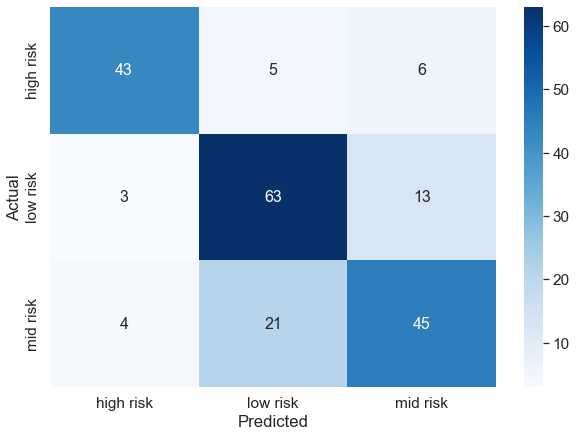

In [95]:
data = confusion_matrix(Y_test,knn_y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

Model Training - Naive Bayes

In [97]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train.values,Y_train.values)

GaussianNB()

Model Evaluation - Naive Bayes

In [98]:
nb_y_pred = nb.predict(X_test.values)

In [99]:
nb_report = classification_report(Y_test,nb_y_pred)
print(nb_report)

              precision    recall  f1-score   support

   high risk       0.84      0.57      0.68        54
    low risk       0.52      0.92      0.67        79
    mid risk       0.42      0.16      0.23        70

    accuracy                           0.57       203
   macro avg       0.59      0.55      0.53       203
weighted avg       0.57      0.57      0.52       203



In [100]:
nb_accuracy = accuracy_score(Y_test,nb_y_pred)
nb_precision = precision_score(Y_test,nb_y_pred,average='macro')
nb_recall = recall_score(Y_test,nb_y_pred,average='macro')
nb_f1 = f1_score(Y_test,nb_y_pred,average='macro')

In [101]:
Model.append("Naive Bayes")
Accuracy.append(nb_accuracy)
Precision.append(nb_precision)
Recall.append(nb_recall)
F1Score.append(nb_f1)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

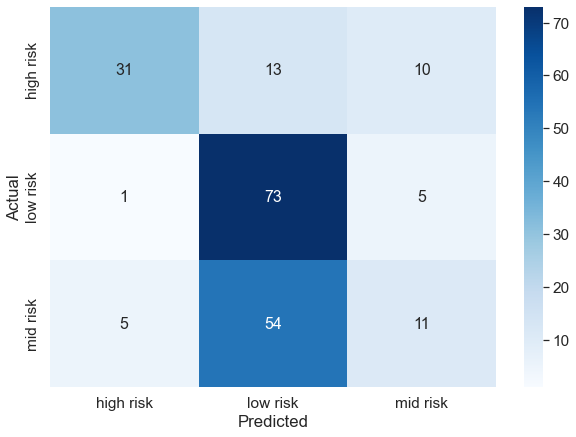

In [102]:
data = confusion_matrix(Y_test,nb_y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

Model Training - Decision Tree

In [103]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

Model Evaluation - Decision Tree

In [104]:
dt_y_pred = dt.predict(X_test)

In [105]:
dt_report = classification_report(Y_test,dt_y_pred)
print(dt_report)

              precision    recall  f1-score   support

   high risk       0.88      0.98      0.93        54
    low risk       0.84      0.85      0.84        79
    mid risk       0.84      0.76      0.80        70

    accuracy                           0.85       203
   macro avg       0.85      0.86      0.86       203
weighted avg       0.85      0.85      0.85       203



In [106]:
dt_accuracy = accuracy_score(Y_test,dt_y_pred)
dt_precision = precision_score(Y_test,dt_y_pred,average='macro')
dt_recall = recall_score(Y_test,dt_y_pred,average='macro')
dt_f1 = f1_score(Y_test,dt_y_pred,average='macro')

In [107]:
Model.append("Decision Tree")
Accuracy.append(dt_accuracy)
Precision.append(dt_precision)
Recall.append(dt_recall)
F1Score.append(dt_f1)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

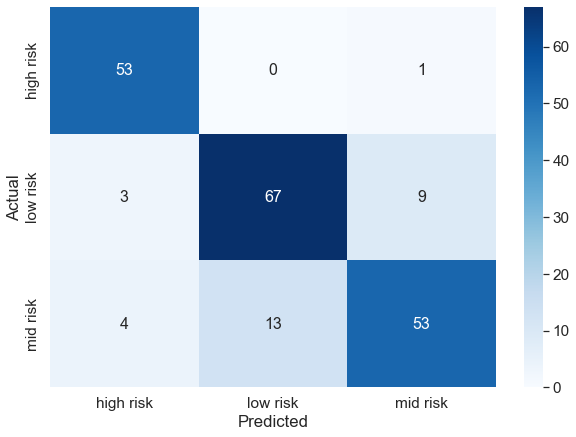

In [108]:
data = confusion_matrix(Y_test,dt_y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

Model Training - Random Forest

In [109]:
import os
import random
from sklearn.ensemble import RandomForestClassifier
seed_value = 50
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
rf = RandomForestClassifier(max_depth = 12, random_state=seed_value)
rf.fit(X_train.values, Y_train.values) 

RandomForestClassifier(max_depth=12, random_state=50)

Model Evaulation - Random Forest

In [110]:
rf_y_pred = rf.predict(X_test.values)

In [111]:
rf_report = classification_report(Y_test,rf_y_pred)
print(rf_report)

              precision    recall  f1-score   support

   high risk       0.91      0.98      0.95        54
    low risk       0.85      0.90      0.87        79
    mid risk       0.87      0.76      0.81        70

    accuracy                           0.87       203
   macro avg       0.88      0.88      0.88       203
weighted avg       0.87      0.87      0.87       203



In [112]:
rf_accuracy = accuracy_score(Y_test,rf_y_pred)
rf_precision = precision_score(Y_test,rf_y_pred,average='macro')
rf_recall = recall_score(Y_test,rf_y_pred,average='macro')
rf_f1 = f1_score(Y_test,rf_y_pred,average='macro')

In [113]:
Model.append("Random Forest")
Accuracy.append(rf_accuracy)
Precision.append(rf_precision)
Recall.append(rf_recall)
F1Score.append(rf_f1)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

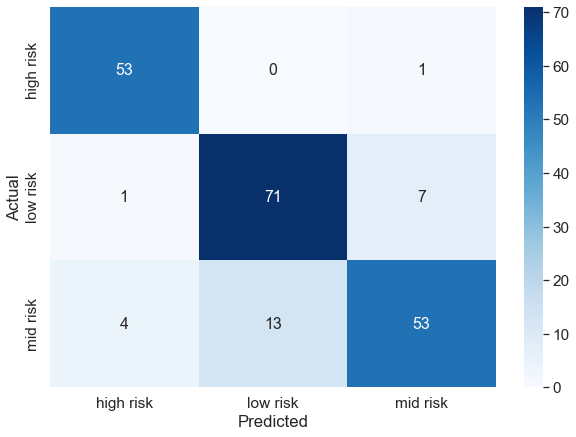

In [114]:
data = confusion_matrix(Y_test,rf_y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

In [116]:
result = pd.DataFrame({'Model':Model,'Accuracy':Accuracy,'Recall':Recall, 'Precision': Precision, 'F1Score':F1Score})
result

,Model,Accuracy,Recall,Precision,F1Score
0,K Nearest Neighbors,0.743842,0.745541,0.756997,0.749522
1,Naive Bayes,0.566502,0.551756,0.594114,0.525717
2,Decision Tree,0.852217,0.862242,0.854034,0.856528
3,Random Forest,0.871921,0.879120,0.875961,0.875585


In [117]:
import pickle
pickle.dump(rf,open('model.pkl','wb'))

Making a Predictive System

In [118]:
age = int(input("Enter Age: "))
systolicBP = int(input("Enter Systolic BP: "))
diastolicBP = int(input("Enter Diastolic BP: "))
bloodSugar = float(input("Enter BS: "))
bodyTemp = float(input("Enter Body Temperature(in F): "))
heartRate = int(input("Enter Heart Rate: "))

In [119]:
input_data = (age,systolicBP,diastolicBP,bloodSugar,bodyTemp,heartRate)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [120]:
prediction = rf.predict(input_data_reshaped)
print("Predicted Risk Level:", prediction)

Predicted Risk Level: ['low risk']
